<a href="https://colab.research.google.com/github/kerenalli/DATA_MINING/blob/main/20210119_Python_4_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np 
import pandas as pd 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict

In [32]:
iris = pd.read_csv('/content/drive/MyDrive/Data_Set/Iris/Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:
# We Dont Need Column Id 
iris.drop('Id', axis='columns', inplace=True)
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [34]:
le = LabelEncoder()
iris['Species'] = le.fit_transform(iris['Species'])
scaler = StandardScaler()
iris.iloc[:, :4] = scaler.fit_transform(iris.iloc[:, :4])

TASK2: Conver DataSet To X, y; After That Use Train_test_split For Our Model

In [35]:
# x Represent Data And y Represent Label
x = iris.iloc[:, :4]
y = iris.iloc[:, -1:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

TASK3: Make Model

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


Befor We Gothrough We Need To Know Which Hyperparamiter Is Good Use GridsearchCV To Undrestand

In [37]:
parametr_decision = [{'max_depth':[10,15, 13, 12, 50],'criterion':['entropy', 'gini']}]

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
de_clf = DecisionTreeClassifier()
grid_de = GridSearchCV(de_clf, parametr_decision, cv=3)
grid_de.fit(x_train, y_train)
grid_de.best_params_
y_predict = grid_de.predict(x_test)
accuracy_score(y_test, y_predict)

0.9333333333333333

For Visualize Gridsearch Not have parameter plot_tree

[Text(133.92000000000002, 201.90857142857143, 'X[2] <= -0.659\nentropy = 1.582\nsamples = 105\nvalue = [38, 34, 33]'),
 Text(100.44000000000001, 170.84571428571428, 'entropy = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(167.40000000000003, 170.84571428571428, 'X[3] <= 0.593\nentropy = 1.0\nsamples = 67\nvalue = [0, 34, 33]'),
 Text(66.96000000000001, 139.78285714285715, 'X[2] <= 0.677\nentropy = 0.196\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(33.480000000000004, 108.72, 'entropy = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(100.44000000000001, 108.72, 'X[2] <= 0.734\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(66.96000000000001, 77.65714285714284, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(133.92000000000002, 77.65714285714284, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 139.78285714285715, 'X[2] <= 0.734\nentropy = 0.323\nsamples = 34\nvalue = [0, 2, 32]'),
 Text(234.36, 108.72, 'X[1] <= -0.356\nentropy = 0.918\nsamples = 

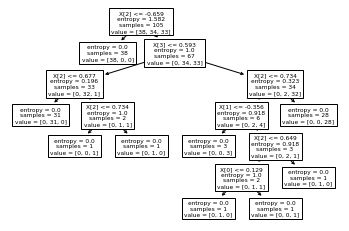

In [39]:
from sklearn import tree
de_clf = DecisionTreeClassifier(max_depth=10, criterion='entropy')
de_clf.fit(x_train, y_train)
tree.plot_tree(de_clf)

If OverFit Occure reduce parameter C and Gamma

In [40]:
from sklearn.svm import SVC
parametr_svm = [{'kernel':['rbf', 'poly'],'degree':[2, 3, 4, 5], 'gamma':['auto', 'scale'], 'C':[0.001, 1000]}]
sv_clf = SVC(probability=True)
svc_grid = GridSearchCV(sv_clf, parametr_svm)
svc_grid.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.001, 1000], 'degree': [2, 3, 4, 5],
                          'gamma': ['auto', 'scale'],
                          'kernel': ['rbf', 'poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [41]:
y_predict_svm = svc_grid.predict(x_test)
accuracy_score(y_test, y_predict_svm)

0.8666666666666667

You Should Always Try Linear Kernel first , especially if the training set is very large

In [42]:
from sklearn.svm import LinearSVC
linear = LinearSVC(C=100, loss='hinge')
linear.fit(x_train, y_train)
predict_linear = linear.predict(x_test)
accuracy_score(y_test, predict_linear)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8222222222222222

# Ensemble Learning

In [43]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc_grid), ('decision', grid_de)], voting='soft')
voting.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('svm',
                              GridSearchCV(cv=None, error_score=nan,
                                           estimator=SVC(C=1.0,
                                                         break_ties=False,
                                                         cache_size=200,
                                                         class_weight=None,
                                                         coef0=0.0,
                                                         decision_function_shape='ovr',
                                                         degree=3,
                                                         gamma='scale',
                                                         kernel='rbf',
                                                         max_iter=-1,
                                                         probability=True,
                                                         random_state=None,
                   

In [44]:
for clf in (svc_grid, voting, grid_de):
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_predict))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV 0.8666666666666667
VotingClassifier 0.9777777777777777
GridSearchCV 0.9333333333333333
